## Extracting Data for Map

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df_utlization = pd.read_csv("../data/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv")
df_epidemiology = pd.read_csv("../data/world_epidemiology.csv")
index = pd.read_csv("../data/index.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../data/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv'

In [ ]:
df_epidemiology_usa = df_epidemiology[df_epidemiology["location_key"].str.contains('^US_[A-Z][A-Z]$', na=False)]

In [88]:
print(len(df_epidemiology_usa))
df_epidemiology_usa_states = df_epidemiology_usa[df_epidemiology_usa["location_key"] != "US"]
print(len(df_epidemiology_usa_states))
df_epidemiology_usa_states["state"] = df_epidemiology_usa_states["location_key"].apply(lambda row: row.split("_")[1])

45314
45314


In [89]:
df_epidemiology_usa_states_cases = df_epidemiology_usa_states[['date', 'state', 'location_key', 'new_confirmed']]
df_epidemiology_usa_states_cases["date"] = df_epidemiology_usa_states_cases["date"].map(
    lambda row: datetime.strptime(row, "%Y-%m-%d").date())

/var/folders/43/ns67_5ts7dxfqlbcgrf6x9f00000gn/T/ipykernel_53357/2805953193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_epidemiology_usa_states_cases["date"] = df_epidemiology_usa_states_cases["date"].map(lambda row: datetime.strptime(row, "%Y-%m-%d").date())


In [90]:
df_utlization["date"] = df_utlization["date"].map(lambda row: datetime.strptime(row, "%Y/%m/%d").date())

In [97]:
df_utlization.head()

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_influenza_confirmed,previous_day_admission_influenza_confirmed_coverage,previous_day_deaths_covid_and_influenza,previous_day_deaths_covid_and_influenza_coverage,previous_day_deaths_influenza,previous_day_deaths_influenza_coverage,total_patients_hospitalized_confirmed_influenza,total_patients_hospitalized_confirmed_influenza_and_covid,total_patients_hospitalized_confirmed_influenza_and_covid_coverage,total_patients_hospitalized_confirmed_influenza_coverage
0,VI,2020-10-19,1,1,0,2,0,0,0.0,2,...,NaN,0,NaN,0,NaN,0,NaN,NaN,0,0
1,VI,2020-10-18,1,1,0,2,0,0,0.0,2,...,NaN,0,NaN,0,NaN,0,NaN,NaN,0,0
2,VT,2020-10-17,1,15,1,1,15,1,0.0,16,...,NaN,0,NaN,0,NaN,0,NaN,NaN,0,0
3,OR,2020-10-16,7,39,17,7,38,18,1.0,59,...,NaN,0,NaN,0,NaN,0,NaN,NaN,0,0
4,HI,2020-10-14,1,19,10,1,19,10,1.0,17,...,NaN,0,NaN,0,NaN,0,NaN,NaN,0,0


In [102]:
df_epidemiology_utilization_usa_states = df_epidemiology_usa_states_cases.merge(
    df_utlization, left_on=["date", "state"], right_on=["date", "state"], how='inner')

In [105]:
df_epidemiology_utilization_usa_states = df_epidemiology_utilization_usa_states [
    ["date", "state", "new_confirmed", "inpatient_beds_utilization"]]

In [112]:
df_epidemiology_utilization_usa_states

,date,state,new_confirmed,inpatient_beds_utilization
0,2020-03-23,AK,4.0,0.375000
1,2020-03-24,AK,7.0,0.357143
2,2020-03-25,AK,14.0,0.267857
3,2020-03-26,AK,11.0,0.285714
4,2020-03-27,AK,17.0,0.283951
...,...,...,...,...
40987,2022-04-03,WY,0.0,0.414620
40988,2022-04-04,WY,0.0,0.410863
40989,2022-04-05,WY,97.0,0.454313
40990,2022-04-06,WY,0.0,0.453300


In [107]:
geography = pd.read_csv("../data/geography.csv")

In [116]:
geography = geography[geography["location_key"].str.contains('^US_[A-Z][A-Z]$', na=False)]
geography["state"] = geography["location_key"].apply(lambda row: row.split("_")[1])

In [117]:
final_df = df_epidemiology_utilization_usa_states.merge(geography, left_on="state", right_on="state")

In [118]:
final_df = final_df[["date", "state", "new_confirmed", "inpatient_beds_utilization", "latitude", "longitude"]]

In [120]:
final_df.to_csv("../data/cases_hospital_bed_usa_statewise.csv")

## Extracting dashboard data

In [59]:
import pandas as pd
from datetime import datetime

In [60]:
df_utlization = pd.read_csv("../data/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv")
df_epidemiology = pd.read_csv("../data/world_epidemiology.csv")

In [61]:
df_epidemiology_usa = df_epidemiology[df_epidemiology["location_key"].str.contains('^US_[A-Z][A-Z]$', na=False)]

In [62]:
df_epidemiology_usa_states = df_epidemiology_usa[df_epidemiology_usa["location_key"] != "US"]
df_epidemiology_usa_states["state"] = df_epidemiology_usa_states["location_key"].apply(lambda row: row.split("_")[1])

In [63]:
df_epidemiology_usa_states_cases = df_epidemiology_usa_states[['date', 'state', 'location_key', 
                                                               'new_confirmed', 'new_deceased', 'new_tested',
                                                              'cumulative_confirmed', 'cumulative_deceased']]
df_epidemiology_usa_states_cases["date"] = df_epidemiology_usa_states_cases["date"].map(
    lambda row: datetime.strptime(row, "%Y-%m-%d").date())

/var/folders/43/ns67_5ts7dxfqlbcgrf6x9f00000gn/T/ipykernel_60872/3831926896.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_epidemiology_usa_states_cases["date"] = df_epidemiology_usa_states_cases["date"].map(


In [64]:
df_utlization["date"] = df_utlization["date"].map(lambda row: datetime.strptime(row, "%Y/%m/%d").date())


In [65]:
df_utlization = df_utlization[["state", "date", "critical_staffing_shortage_today_yes", "inpatient_beds_utilization", 
                               "percent_of_inpatients_with_covid", "adult_icu_bed_utilization", 
                               "adult_icu_bed_covid_utilization", "inpatient_beds", "inpatient_beds_used", 
                               "inpatient_beds_used_covid", "staffed_adult_icu_bed_occupancy", 
                               "staffed_icu_adult_patients_confirmed_and_suspected_covid", 
                              "total_staffed_adult_icu_beds"]]

In [66]:
final_df = df_epidemiology_usa_states_cases.merge(df_utlization, 
                                                  left_on=["date", "state"], right_on=["date", "state"], how='inner')

In [67]:
final_df.to_csv("dashboard_metrics.csv")

## Data for minimum values of metrics for dashboard

In [48]:
import pandas as pd
from datetime import datetime

In [49]:
df_utilization = pd.read_csv("../data/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv")
df_utilization["date"] = df_utilization["date"].map(lambda row: datetime.strptime(row, "%Y/%m/%d").date())
df_utilization = df_utilization[["state", "date", "critical_staffing_shortage_today_yes", 
                                 "inpatient_beds_utilization", 
                               "percent_of_inpatients_with_covid", "adult_icu_bed_utilization", 
                               "adult_icu_bed_covid_utilization", "inpatient_beds"]]


In [50]:
df_utilization_groupby = df_utilization.groupby(by=["state", "date"], as_index=False).sum()

In [51]:
unique_states = set(df_utilization_groupby["state"])

In [52]:
df = pd.DataFrame(columns=["state", "date", "critical_staffing_shortage_today_yes", "inpatient_beds_utilization", 
                               "percent_of_inpatients_with_covid", "adult_icu_bed_utilization", 
                               "adult_icu_bed_covid_utilization", "inpatient_beds"])

In [53]:

for state in unique_states:
    df_state = df_utilization_groupby[df_utilization_groupby["state"]==state]
    df_state.dropna(inplace=True)
    df = df.append(df_state[df_state["date"] == df_state["date"].min()], ignore_index = True)
    
    

/var/folders/43/ns67_5ts7dxfqlbcgrf6x9f00000gn/T/ipykernel_60872/2481651018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state.dropna(inplace=True)
/var/folders/43/ns67_5ts7dxfqlbcgrf6x9f00000gn/T/ipykernel_60872/2481651018.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_state[df_state["date"] == df_state["date"].min()], ignore_index = True)


In [54]:
df.to_csv("baseline_dashboard_metrics.csv")

In [55]:
df_utilization = pd.read_csv("../data/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv")

In [58]:
df_utilization[df_utilization["inpatient_beds_utilization"] == df_utilization["inpatient_beds_utilization"].max()]

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_influenza_confirmed,previous_day_admission_influenza_confirmed_coverage,previous_day_deaths_covid_and_influenza,previous_day_deaths_covid_and_influenza_coverage,previous_day_deaths_influenza,previous_day_deaths_influenza_coverage,total_patients_hospitalized_confirmed_influenza,total_patients_hospitalized_confirmed_influenza_and_covid,total_patients_hospitalized_confirmed_influenza_and_covid_coverage,total_patients_hospitalized_confirmed_influenza_coverage
8342,LA,2020/07/15,0,4,190,1,3,190,0.0,9,...,NaN,0,NaN,0,NaN,0,NaN,NaN,0,0


## Data for test result duration

In [37]:
import pandas as pd
from datetime import datetime

In [38]:
df_result_timing = pd.read_csv("../data/COVID-19_Diagnostic_Laboratory_Testing__PCR_Testing__Time_Series.csv")

In [39]:
df_result_timing = df_result_timing[["state", "date", "new_results_reported"]]

In [40]:
df_result_timing = df_result_timing.groupby(["state", "date"], as_index=False).sum()

In [41]:
df_result_timing["date"] = df_result_timing["date"].map(lambda row: datetime.strptime(row, "%Y/%m/%d").date())

In [42]:
df_result_timing.head()

,state,date,new_results_reported
0,AK,2020-03-01,4
1,AK,2020-03-02,0
2,AK,2020-03-03,2
3,AK,2020-03-04,12
4,AK,2020-03-05,9


In [150]:
df_epidemiology = pd.read_csv("../data/world_epidemiology.csv")
df_epidemiology_usa = df_epidemiology[df_epidemiology["location_key"].str.contains('^US_[A-Z][A-Z]$', na=False)]
df_epidemiology_usa_states["state"] = df_epidemiology_usa_states["location_key"].apply(lambda row: row.split("_")[1])


In [151]:
df_epidemiology_usa_states_tests = df_epidemiology_usa_states[['date', 'state', 'location_key', 'new_tested']]

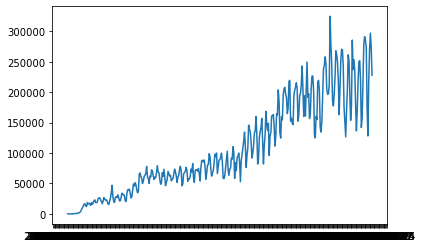

In [152]:
import matplotlib.pyplot as plt
df_epidemiology_usa_states_tests_NY = df_epidemiology_usa_states_tests[
    df_epidemiology_usa_states_tests["state"]=="NY"]
df_epidemiology_usa_states_tests_NY = df_epidemiology_usa_states_tests_NY[["date", "new_tested"]]
plt.plot(df_epidemiology_usa_states_tests_NY["date"], df_epidemiology_usa_states_tests_NY["new_tested"])

In [140]:
df_epidemiology_usa_states_tests.fillna(0, inplace=True)

/var/folders/43/ns67_5ts7dxfqlbcgrf6x9f00000gn/T/ipykernel_60872/2614529380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_epidemiology_usa_states_tests.fillna(0, inplace=True)


In [153]:
df_epidemiology_usa_states_tests = df_epidemiology_usa_states_tests[["date", "state", "new_tested"]]


In [154]:
df_epidemiology_usa_states_tests["date"] = df_epidemiology_usa_states_tests["date"].map(
    lambda row: datetime.strptime(row, "%Y-%m-%d").date())

In [68]:
df_testing = pd.read_csv("../data/testing_timeseries.csv")

In [69]:
df_testing = df_testing[["date", "state", "tests_combined_total"]]
df_testing["date"] = df_testing["date"].map(
    lambda row: datetime.strptime(row, "%m/%d/%Y").date())

# df_testing_NY = df_testing[df_testing["state"]=="NY"]
# df_testing_OH = df_testing[df_testing["state"]=="OH"]
# df_testing_UT = df_testing[df_testing["state"]=="UT"]
# df_testing_CA = df_testing[df_testing["state"]=="CA"]
# df_testing_NY["new_tested"] = df_testing_NY["tests_combined_total"].diff(periods=1)
# df_testing_OH["new_tested"] = df_testing_OH["tests_combined_total"].diff(periods=1)
# df_testing_UT["new_tested"] = df_testing_UT["tests_combined_total"].diff(periods=1)
# df_testing_CA["new_tested"] = df_testing_CA["tests_combined_total"].diff(periods=1)

# df_testing["new_tested"] = df_testing["tests_combined_total"].diff(periods=1)

In [74]:
df_testing.sort_values(['state', 'date'], inplace=True)

In [76]:
df_testing['new_tested'] = df_testing.groupby('state')['tests_combined_total'].diff(periods=1)

In [78]:
df_testing.fillna(0,inplace=True)

In [79]:
df_testing = df_testing[["date", "state", "new_tested"]]

In [80]:
df_testing = df_testing[df_testing["new_tested"]>0]

In [81]:
df_result_timing

,state,date,new_results_reported
0,AK,2020-03-01,4
1,AK,2020-03-02,0
2,AK,2020-03-03,2
3,AK,2020-03-04,12
4,AK,2020-03-05,9
...,...,...,...
42458,WY,2022-04-04,445
42459,WY,2022-04-05,888
42460,WY,2022-04-06,898
42461,WY,2022-04-07,694


In [82]:
final_df = df_result_timing.merge(df_testing,left_on=["date", "state"], 
                          right_on=["date", "state"], how='inner' )

In [85]:
final_df.to_csv("testing_results.csv")

In [83]:
final_df

,state,date,new_results_reported,new_tested
0,AK,2020-03-07,10,5.0
1,AK,2020-03-08,8,8.0
2,AK,2020-03-09,19,19.0
3,AK,2020-03-10,13,17.0
4,AK,2020-03-11,51,51.0
...,...,...,...,...
34829,WY,2022-03-28,456,3815.0
34830,WY,2022-03-29,696,2409.0
34831,WY,2022-04-01,867,2433.0
34832,WY,2022-04-05,888,2028.0


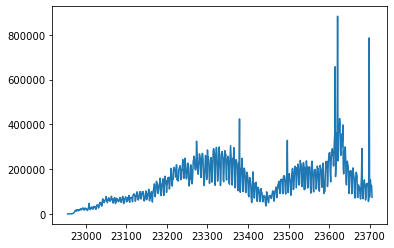

In [84]:
import matplotlib.pyplot as plt
values = final_df[final_df["state"]=="NY"][["new_tested"]]
plt.plot(values)

## Vaccination access

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df_vaccination_access = pd.read_csv("../data/facility-boundary-us-all.csv")

In [3]:
df_vaccination_access

,facility_place_id,facility_provider_id,facility_name,facility_latitude,facility_longitude,facility_country_region,facility_country_region_code,facility_sub_region_1,facility_sub_region_1_code,facility_sub_region_2,facility_sub_region_2_code,facility_region_place_id,mode_of_transportation,travel_time_threshold_minutes,facility_catchment_boundary
0,ChIJJ_lVoRNaDYgRXuLKW9p56Bw,bbd35a36-fa00-40d2-bdc5-3a0589b10832,Aunt Martha's Health Center,40.1352,-87.6362,United States,US,Illinois,US-IL,Vermilion County,17183,ChIJUweC53REDYgRGbrgYhqtJQs,drive,15,"{ ""type"": ""MultiPolygon"", ""coordinates"": [ [ [..."
1,ChIJOZHCYYm23okRSb56X80t0yc,cdc0f389-80eb-4440-b0ec-60528a3be363,Kinney Drugs,43.0424,-74.8584,United States,US,New York,US-NY,Herkimer County,36043,ChIJyeOziPvA3okRBqScD7E9IDY,drive,15,"{ ""type"": ""Polygon"", ""coordinates"": [ [ [-74.8..."
2,ChIJg0LxbQGxU4gRSjFU5cFTyyM,2481a85e-165f-4d3d-9cb3-d614e7369088,Harris Teeter Pharmacy,36.1177,-80.3106,United States,US,North Carolina,US-NC,Forsyth County,37067,ChIJOTtetxYIU4gRWkOAllmvnQ8,drive,15,"{ ""type"": ""MultiPolygon"", ""coordinates"": [ [ [..."
3,ChIJ2y5ZeVIDIogR_lgOF_N5Blc,f1b0e054-ebe5-4595-8b2b-3ea0f3a58e6f,Downtown Drugs,43.6047,-84.7765,United States,US,Michigan,US-MI,Isabella County,26073,ChIJiVwjNcwDIogR16fnxhyjLyo,drive,15,"{ ""type"": ""MultiPolygon"", ""coordinates"": [ [ [..."
4,ChIJ91yLETQc9YgRhf_iSOUTJ1w,b6eb3ee6-965d-42c1-8bdb-75844825d97f,Walmart Pharmacy,33.7282,-84.5080,United States,US,Georgia,US-GA,Fulton County,13121,ChIJ0dNnmHCr9YgRE8XXDotB0tc,drive,15,"{ ""type"": ""MultiPolygon"", ""coordinates"": [ [ [..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650775,ChIJAQDQzzqPE4gRUBjcJ09TiJc,a531ca54-8459-44c1-b654-434a9f923ea4,Cass County Local Health Department,40.7692,-86.3497,United States,US,Indiana,US-IN,Cass County,18017,ChIJlRJKfvuHE4gRyFRCLkaZmh0,walk,60,"{ ""type"": ""Polygon"", ""coordinates"": [ [ [-86.3..."
650776,ChIJ2Wu_LUt_I4gRbmJ6GS0LXNo,583c349d-7473-4f3d-905d-4048c41cbaf0,Discount Rx,42.9839,-83.6771,United States,US,Michigan,US-MI,Genesee County,26049,ChIJZxlEtTp5I4gRjxdqahrBdfU,walk,60,"{ ""type"": ""Polygon"", ""coordinates"": [ [ [-83.6..."
650777,ChIJb_psL4a75YkRdkNj0vzUj90,ab3a2b50-ae29-4f34-8faa-ce0d67e8421a,Walgreens Pharmacy,41.4916,-71.4375,United States,US,Rhode Island,US-RI,Washington County,44009,ChIJxbKLtNTB5YkR5UzSIqFkN_8,walk,60,"{ ""type"": ""Polygon"", ""coordinates"": [ [ [-71.4..."
650778,ChIJgUIL6jTKjocRjXTFStQrAJk,b7b5ea38-74a8-4c80-99e2-8cb8e3683820,Hy-Vee Grocery Store,43.5277,-96.7894,United States,US,South Dakota,US-SD,Minnehaha County,46099,ChIJ16y94Ji0jocRbXLuf-gRGrM,walk,60,"{ ""type"": ""Polygon"", ""coordinates"": [ [ [-96.8..."


In [4]:
df_vaccination_access = df_vaccination_access[["facility_name", "facility_latitude", "facility_longitude",
                                               "facility_country_region_code", "facility_sub_region_1_code"]]

In [6]:
df_vaccination_access = df_vaccination_access[df_vaccination_access["facility_country_region_code"] == "US"]
df_vaccination_access["state"] = df_vaccination_access["facility_sub_region_1_code"].apply(
    lambda row: row.split("-")[1])

In [8]:
df_vaccination_access = df_vaccination_access[["facility_name", "facility_latitude", "facility_longitude", "state"]]

In [10]:
len(set(df_vaccination_access["state"]))

51

In [11]:
df_vaccination_access.to_csv("vaccination_sites.csv")

In [34]:
## Remove rows after march 15 2020
from datetime import datetime
df = pd.read_csv("../data/cases_hospital_bed_usa_statewise.csv")
df["date"] = df["date"].map(
    lambda row: datetime.strptime(row, "%Y-%m-%d").date())
print(len(df))
print(df.head())
date = "2020-03-15"
date = datetime.strptime(date, "%Y-%m-%d").date()
df_filtered = df[df["date"]>date]
print(len(df_filtered))

39227
   Unnamed: 0        date state  new_confirmed  inpatient_beds_utilization  \
0           0  2020-03-23    AK            4.0                    0.375000   
1           1  2020-03-24    AK            7.0                    0.357143   
2           2  2020-03-25    AK           14.0                    0.267857   
3           3  2020-03-26    AK           11.0                    0.285714   
4           4  2020-03-27    AK           17.0                    0.283951   

   latitude  longitude  cases_per_population  
0      64.0     -150.0              0.000542  
1      64.0     -150.0              0.000948  
2      64.0     -150.0              0.001896  
3      64.0     -150.0              0.001490  
4      64.0     -150.0              0.002302  
38456


In [36]:
df_filtered.to_csv("cases_hospital_bed_usa_statewise.csv")